In [2]:
import requests
import pandas as pd

import os
import numpy as np
import skimage
import matplotlib.pyplot as plt
%matplotlib inline
from skimage import data, io, filters, color, exposure


from numpy import array
import pickle  

import keras
##from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
##import tensorflow as tf

from pandas_ml import ConfusionMatrix

Using TensorFlow backend.


In [3]:
import sklearn

In [4]:
%ls

 Volume in drive C is Windows
 Volume Serial Number is 7C0D-FBBE

 Directory of C:\Users\taras\Desktop\histolines\data\general image

2019-11-17  05:10 PM    <DIR>          .
2019-11-17  05:10 PM    <DIR>          ..
2019-11-17  05:10 PM    <DIR>          .ipynb_checkpoints
2019-11-17  10:29 AM    <DIR>          data
2019-11-17  05:09 PM                72 image classifier.ipynb
2019-11-17  11:55 AM           310,566 image reader.ipynb
2019-11-17  05:10 PM           337,485 image reader_general.ipynb
2019-11-17  05:09 PM        35,565,493 image_dataframe.pkl
               4 File(s)     36,213,616 bytes
               4 Dir(s)  515,208,130,560 bytes free


In [39]:

pkl_file = open('image_dataframe.pkl', 'rb')  
data= pickle.load(pkl_file)
pkl_file.close()  


In [40]:
data.head()

,image_path,cat,images_data
0,C:/Users/taras/Desktop/histolines/data/general...,cat,"[[[0, 0, 0], [210, 206, 205], [210, 206, 205],..."
1,C:/Users/taras/Desktop/histolines/data/general...,cat,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
2,C:/Users/taras/Desktop/histolines/data/general...,cat,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
3,C:/Users/taras/Desktop/histolines/data/general...,cat,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
4,C:/Users/taras/Desktop/histolines/data/general...,cat,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."


In [41]:
all_image_gray=[]
for image in data['images_data']:
    all_image_gray.append(color.rgb2gray(image))
all_images_gray_array=array(all_image_gray)   
all_images_gray_array.shape



(1026, 200, 200)

In [42]:
all_images_gray_array.shape


(1026, 200, 200)

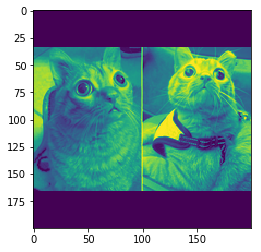

In [43]:
plt.imshow((all_images_gray_array[1]))

In [44]:
file_names_array=array(data['cat']) 
pd.value_counts(pd.Series(file_names_array))

cat         660
iphone11    366
dtype: int64

In [45]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
file_names_array_cat= encoder.fit_transform(file_names_array)

##print(file_names_array_cat)

In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(all_images_gray_array, file_names_array, test_size=0.3)


In [47]:
img_rows, img_cols = 200, 200
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
##x_train /= 255
##x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


x_train shape: (718, 200, 200, 1)
718 train samples
308 test samples


In [48]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
y_train= encoder.fit_transform(y_train)
y_train=np.hstack((y_train, 1 - y_train))
y_test= encoder.fit_transform(y_test)
y_test=np.hstack((y_test, 1 - y_test))
##print(y_train)

In [49]:
x_train_rot=[]
y_train_rot=[]
for i in range(len(x_train)):
    x_train_rot.append(x_train[i])
    y_train_rot.append(y_train[i])
               
    x_train_rot.append(x_train[i][::-1,:,:])
    y_train_rot.append(y_train[i])
    
    x_train_rot.append(x_train[i][:,::-1,:])
    y_train_rot.append(y_train[i])
               
    x_train_rot.append(x_train[i].transpose([1,0,2]))
    y_train_rot.append(y_train[i])
x_train_rot = np.array(x_train_rot,dtype='float32')
y_train_rot = np.array(y_train_rot,dtype='float32')
len(x_train_rot)

2872

In [50]:

from pandas_ml import ConfusionMatrix
def model_eval():
    score = model.evaluate(x_test, y_test, verbose=0)

    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

    plt.figure(figsize=[8,6])
    plt.plot(history.history['loss'],'r',linewidth=3.0)
    plt.plot(history.history['val_loss'],'b',linewidth=3.0)
    plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Loss',fontsize=16)
    plt.title('Loss Curves',fontsize=16)
    # Accuracy Curves
    plt.figure(figsize=[8,6])
    plt.plot(history.history['acc'],'r',linewidth=3.0)
    plt.plot(history.history['val_acc'],'b',linewidth=3.0)
    plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Accuracy',fontsize=16)
    plt.title('Accuracy Curves',fontsize=16)
    predicted_classes = model.predict_classes(x_test)
    y_test_list=[]
    for i in range(len(y_test)):
        if ((y_test[i][0])==1):
            y_test_list.append(1)
        if ((y_test[i][1])==1):
            y_test_list.append(2)

    from sklearn.metrics import confusion_matrix
    confusion_matrix(y_test_list,predicted_classes)
    ### got from https://pandas-ml.readthedocs.io/en/latest/conf_mat.html

    predicted_classes = model.predict_classes(x_test)
    y_test_list=[]
    for i in range(len(y_test)):
        if ((y_test[i][0])==1):
            y_test_list.append("no")
        if ((y_test[i][1])==1):
            y_test_list.append("yes")


    ##from sklearn.metrics import confusion_matrix
    ##confusion_matrix(y_test_list,predicted_classes)
    predicted_classes_list=[]
    for label in predicted_classes:

        if (label==0):
            predicted_classes_list.append("no")
        if (label==1):
            predicted_classes_list.append("yes")

    confusion_matrix = ConfusionMatrix(y_test_list,predicted_classes_list)
    print("Confusion matrix:\n%s" % confusion_matrix)
    ##confusion_matrix.plot()
    ##confusion_matrix.print_stats()

In [51]:
# Training the model

In [52]:
batch_size =10
##batch_size = 5
num_classes = 2
##epochs = 10
epochs =20


model = Sequential()
model.add(Conv2D(32, kernel_size=(2, 2), activation='relu', input_shape=input_shape))
model.add(Conv2D(32, kernel_size=(4, 4),activation='relu'))

model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Dropout(0.25))

model.add(Conv2D(32, kernel_size=(8, 8), activation='relu'))

model.add(Dropout(0.25))


model.add(Conv2D(32, kernel_size=(32, 32),  activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))






model.add(Flatten())
model.add(Dense(28, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(num_classes, activation='sigmoid'))



model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 199, 199, 32)      160       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 196, 196, 32)      16416     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 49, 49, 32)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 42, 42, 32)        65568     
_________________________________________________________________
dropout_14 (Dropout)         (None, 42, 42, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 11, 11, 32)        1048608   
__________

Train on 2872 samples, validate on 308 samples
Epoch 1/20
2872/2872 [==============================] - 82s 28ms/step - loss: 0.6419 - acc: 0.6593 - val_loss: 0.5385 - val_acc: 0.7532
Epoch 2/20
2872/2872 [==============================] - 74s 26ms/step - loss: 0.4801 - acc: 0.7813 - val_loss: 0.4768 - val_acc: 0.7938
Epoch 3/20
2872/2872 [==============================] - 74s 26ms/step - loss: 0.3489 - acc: 0.8567 - val_loss: 0.4845 - val_acc: 0.7662
Epoch 4/20
2872/2872 [==============================] - 74s 26ms/step - loss: 0.2696 - acc: 0.8969 - val_loss: 0.2714 - val_acc: 0.8977
Epoch 5/20
2872/2872 [==============================] - 74s 26ms/step - loss: 0.2046 - acc: 0.9244 - val_loss: 0.3221 - val_acc: 0.8912
Epoch 6/20
2872/2872 [==============================] - 74s 26ms/step - loss: 0.1433 - acc: 0.9450 - val_loss: 0.2813 - val_acc: 0.8912
Epoch 7/20
2872/2872 [==============================] - 74s 26ms/step - loss: 0.1299 - acc: 0.9514 - val_loss: 0.2498 - val_acc: 0.9140
E

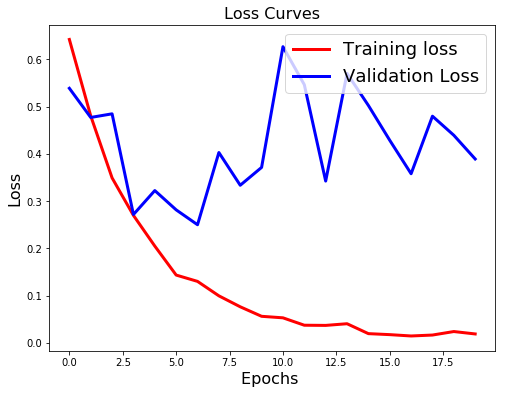

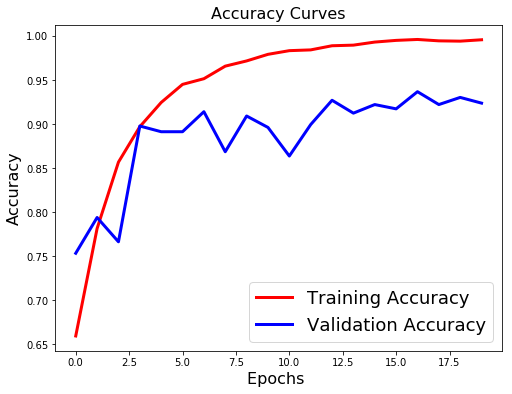

In [53]:


history = model.fit(x_train_rot, y_train_rot,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
model_eval()